In [1]:
##############################################################
# Analysis of Proximity to Equator vs. Temperature in Cities #
# Esther Lowe - 06/21/2019                                   #
##############################################################

# To come to a reasonable conclusion about the matter, this program was designed to:

# 1. Use data for over 8000 random cities based on latitude and longitude.
# 2. Perform a weather check on each of the cities using a series of successive API calls.
# 3. Create scatter plots for the analysis of:
#    a. Temperature (F) vs. Latitude
#    b. Humidity (%) vs. Latitude
#    c. Cloudiness (%) vs. Latitude
#    d. Wind Speed (mph) vs. Latitude
#    e. Create a heatmap to visualize the cities used and consider the information analyzed
# 4. Compile the results by creating a print log of each city as it's being processed with the city number and city name.
# 5. Make the information available by saving both a CSV of all data retrieved and png images for each scatter plot generated.

In [2]:
# Import Dependencies, configuring any API keys and grabbing csv files:

# API keys
from api_keys import owm_api_key, gkey

# Dependencies
import os
import csv
import matplotlib.pyplot as plt
import requests
import pandas as pd
from pprint import pprint
import gmaps


# Load in the randomized cities csv:
cities_csv = "Resources/random_cities.csv"
cities_df = pd.read_csv(cities_csv)


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# Build partial query URL
query_url = f"{url}appid={owm_api_key}&units={units}&q="

In [4]:
cities = cities_df.iloc[:, 1]

# set up lists to hold reponse info
no_city_data = []
yes_city_data = []
lat= []
lng = [] 
country = []

max_temp = []
humidity = []
cloudiness = []
wind_speed = []

# Loop through the list of cities and perform a request to get the latitude, longitude, current temerature, humidity, percent cloudiness, and windspeed
# data on each city and add it to the appropriate list (if the information is not available, it prints the city name to a list):
# (The try function will act as a "print log" of sorts by making a list of all cities without data available.)

print("-----START DATA PROCESSING -----")
for index, city in enumerate(cities):
    if index % 100 == 0:
        print(index, city)
    try:
        response = requests.get(query_url + city).json()
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        
        yes_city_data.append(city)
        lng.append(response['coord']['lon'])
        lat.append(response['coord']['lat'])
        country.append(response['sys']['country'])

        
    except KeyError:
        no_city_data.append(city)

print("-----END DATA PROCESSING -----")

-----START DATA PROCESSING -----
0 Sendai
100 Igarape do Meio
200 Blois
300 Mareuil-sur-Ourcq
400 Kilmichael
500 Tallulah
600 Onomichi
700 Salies-de-Bearn
800 Nagasaki
900 Makamicho
1000 Leuk
1100 Hiratsuka
1200 Estepona
1300 Cambridge
1400 Champagnole
1500 Takatsuki
1600 Saint Cloud
1700 Husnes
1800 Glasgow
1900 Kagoshima
2000 Bowie
2100 Derendingen
2200 Saland
2300 Elbeuf
2400 Fitzgerald
2500 Le Kremlin-Bicetre
2600 Yokkaichi
2700 Akita
2800 Ludwigsfelde
2900 Courthezon
3000 Velky Osek
3100 Wolverhampton
3200 Winsford
3300 Swisttal
3400 Fukuecho
3500 Nantong
3600 Ōita
3700 Sopot
3800 Luegde
3900 Fort McMurray
4000 Las Vegas
4100 Newton Abbot
4200 Loganville
4300 Echt
4400 London
4500 Severac-le-Chateau
4600 Triengen
4700 Dolni Kalna
4800 Oost-Souburg
4900 La Porte
5000 Frankfurt am Main
5100 Hamburg
5200 Vandoeuvre-les-Nancy
5300 Samstagern
5400 Vsejany
5500 Au
5600 Anderson
5700 Royse City
5800 Holasice
5900 Sandersleben
6000 Sterling Heights
6100 Dorking
6200 Teotonio Vilela
6300 P

In [5]:
print(len(country))
print(len(no_city_data))

8259
434


In [6]:
#Create a new DataFrame with the lists generated above:
weather_dict = {
    "City" : yes_city_data,
    "Country" : country,
    "Latitude" : lat,
    "Longitude" : lng,
    "Maximum Temperature (F)" : max_temp,
    "Humidity" : humidity,
    "% Cloudiness" : cloudiness,
    "Wind Speed (mph)" : wind_speed
}

weather_data_df = pd.DataFrame(weather_dict)
print(len(weather_data_df))
weather_data_df.head()

8259


,City,Country,Latitude,Longitude,Maximum Temperature (F),Humidity,% Cloudiness,Wind Speed (mph)
0,Sendai,JP,38.27,140.87,66.20,88,75,4.70
1,Otawara,JP,36.87,140.03,64.99,93,75,4.70
2,Brive-la-Gaillarde,FR,45.16,1.53,73.00,76,94,4.05
3,Kiskoros,HU,46.62,19.29,72.00,83,0,9.17
4,Jefferson City,US,38.58,-92.17,79.00,47,40,13.87


In [7]:
# Saving a csv file of the weather_data_df output:
weather_data_df.to_csv("Resources/weather_data.csv", encoding="utf-8", index=False)

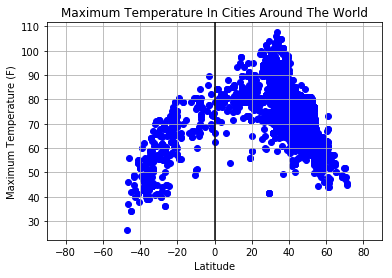

In [8]:
# Build a scatter plot for each data type
plt.scatter(weather_data_df["Latitude"], weather_data_df["Maximum Temperature (F)"], marker="o", color = 'blue')

# Equator:
plt.axvline(x=0, c = 'black')

# Incorporate the other graph properties
plt.title("Maximum Temperature In Cities Around The World")
plt.ylabel("Maximum Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)

# Save the figure
plt.savefig("Maximum Temperature In Cities Around The World.png")

# Show plot
plt.show()

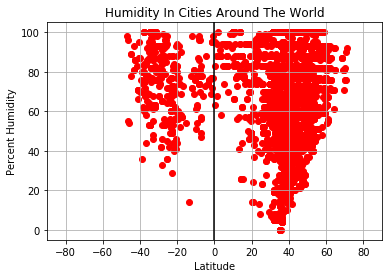

In [9]:
plt.scatter(weather_data_df["Latitude"], weather_data_df["Humidity"], marker="o", color = 'r')
# Prime Meridian:
plt.axvline(x=0, c = 'black')

# Incorporate the other graph properties
plt.title("Humidity In Cities Around The World")
plt.ylabel("Percent Humidity")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)

# Save the figure
plt.savefig("Humidity In Cities Around The World.png")

# Show plot
plt.show()

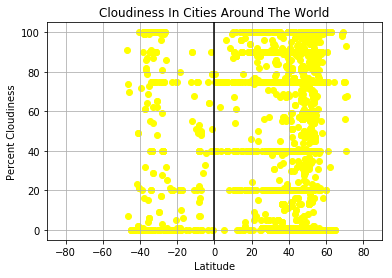

In [10]:
plt.scatter(weather_data_df["Latitude"], weather_data_df["% Cloudiness"], marker="o", color = 'yellow')
# Prime Meridian:
plt.axvline(x=0, c = 'black')

# Incorporate the other graph properties
plt.title("Cloudiness In Cities Around The World")
plt.ylabel("Percent Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)

# Save the figure
plt.savefig("Percent Cloudiness In Cities Around The World.png")

# Show plot
plt.show()

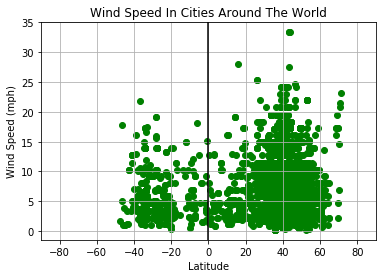

In [11]:
plt.scatter(weather_data_df["Latitude"], weather_data_df["Wind Speed (mph)"], marker="o", color = 'green')
# Prime Meridian:
plt.axvline(x=0, c = 'black')

# Incorporate the other graph properties
plt.title("Wind Speed In Cities Around The World")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)

# Save the figure
plt.savefig("Wind Speed In Cities Around The World.png")

# Show plot
plt.show()

In [12]:
# HEAT MAP Of the random cities to see where the data is coming from:
# Configure gmaps with API key
gmaps.configure(api_key=gkey)


In [13]:
# Store 'Lat' and 'Lng' into  locations 
locations = weather_data_df[["Latitude", "Longitude"]].astype(float)

# Convert Temperature to float and store
# NOTE: Although I'm using temperature to generate data for weights,
# the temperature is merely a data point being used to determine the density of my cities
# rather than their temperature.

temp = weather_data_df["Maximum Temperature (F)"].astype(float)

In [14]:
# Create a Heatmap layer to see where the cities are that have been used
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=temp, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 1)

# Adjust heat_layer setting to help with heatmap dissipating on zoom
heat_layer.dissipating = False
heat_layer.max_intensity = 100
heat_layer.point_radius = 1

fig.add_layer(heat_layer)

fig


Figure(layout=FigureLayout(height='420px'))